In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 90)

df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
#df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take
frame_number,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69
...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103


In [3]:
#df = df.loc[(df["quadrant"] == 3) & (df["fish_id"] == 1)]
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)


In [4]:
df.tail_coords


frame_number
1276     ((1.0, 1.0000573316712842), (1.031550283841994...
1277     ((1.0, 1.0017590444257127), (1.030902797752337...
1278     ((1.0, 0.9998988815681926), (1.030986970014337...
1279     ((1.0, 0.9980453015716151), (1.032105088161948...
1280     ((1.0, 0.9999164764406192), (1.032442409719052...
                               ...                        
18984    ((1.0, 0.997557372231594), (1.2966424643241747...
18985    ((1.0, 0.9959407016995924), (1.365455546974131...
18986    ((1.0, 0.9998938656633769), (1.294553914570478...
18987    ((1.0, 0.9999659390586094), (1.296234265181226...
18988    ((1.0, 1.002398701740083), (1.2990835075954954...
Name: tail_coords, Length: 9901, dtype: object

In [5]:
df["tail_uniformity"] = np.NaN

def vari(the_tuple):
    if isinstance(the_tuple, tuple):
        y_tuple = tuple(zip(*the_tuple))[1]
        cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100        
        result = cv(y_tuple)
        if result is not None:      
            return result
        else:
            return np.NaN
    else:
        np.NaN

df["tail_uniformity"] = df.tail_coords.apply(vari)

In [6]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity
frame_number,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69,0.351359
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69,0.304076
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164
...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103,0.408253
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103,0.246324
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103,0.128354


In [7]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


In [8]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    cycle_number = 1
    for real_index, nominal_index in enumerate(the_idxs):       
        current_position = df.loc[(df.index == nominal_index) & (df["sequence"] == n), "ult"].iloc[0]
        print(current_position)
        print(real_index)       
        if real_index == 0:
            last_position = current_position
                    
        elif real_index == 1:           
            if current_position > last_position:                
                trend = "up"
                
            elif current_position < last_position:
                trend = "down"
                
            else:
                trend = "undefined"
                #  Keep the same last_tail_direction                
                              
        else:
            if (current_position > last_position) & (trend=="undefined"):
                trend = "up"
                print("first")
            elif (current_position < last_position) & (trend=="undefined"):
                trend = "down"
                print("second")
            elif (current_position > last_position) & (trend=="dow"):
                cycle_number=cycle_number+1
            
            elif (current_position < last_position) & (trend=="up"):
                cycle_number=cycle_number+1    
                print("third")           

            elif (current_position == last_position):
                pass
            
           
  
        last_position = current_position
        
        df.loc[(df.index == nominal_index) & (df["sequence"] == n), "cycle"] = cycle_number    
    
    
    
    

21322
1.003994041885862
0
1.0017819945667412
1
1.0078374744480776
2
1.0060987502853305
3
0.9979573360889491
4
1.0020054107236707
5
21325
1.0000763858374064
0
0.9964791220780835
1
0.9873999895017214
2
0.9912584787450669
3
1.0000655872093098
4
1.0043563111904774
5
0.9850006870146828
6
5
1.0195141452874346
0
1.0195141452874346
1
1.0235336050330601
2
first
1.0029234217973926
3
third
0.9984198054269178
4
third
0.9984198054269178
5
0.9828174528286041
6
third
6
1.0029190190537212
0
0.9999595889316493
1
0.9999595889316493
2
1.002938848165759
3
1.002938848165759
4
1.0043506665718658
5
8
1.0028790298413508
0
1.0029432808175922
1
1.0029234217973926
2
third
1.0029234217973926
3
1.0029158472509587
4
third
1.0029158472509587
5
1.0014122927318172
6
third
0.9998698238176561
7
third
0.9998698238176561
8
0.9998698238176561
9
0.9998698238176561
10
14628
0.9987684502069234
0
0.9979307605705898
1
0.9991591987337998
2
0.9975444225676604
3
0.9998923416435692
4
1.0020261897408416
5
0.9999150447750482
6
1.0010

df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        #df.loc[i, "cycle"] = cycle_number
        df.loc[(df.index == i) & (df["sequence"] == n), "cycle"] = cycle_number

        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            

In [9]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481,1.000333,1.001754,1.003994,1.0
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332,0.999026,0.998708,1.001782,1.0
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9998988815681926), (1.030986970014337...",69,0.351359,0.999408,1.000377,1.007837,1.0
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9980453015716151), (1.032105088161948...",69,0.304076,1.000358,1.001782,1.006099,1.0
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164,0.999485,0.998389,0.997957,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36181,"((1.0, 0.997557372231594), (1.2966424643241747...",103,0.408253,1.000223,0.997370,0.990122,1.0
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9959407016995924), (1.365455546974131...",103,0.246324,1.000709,0.999499,0.995172,1.0
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9998938656633769), (1.294553914570478...",103,0.128354,0.999359,0.997949,0.997415,1.0


In [10]:
df = df.loc[df["tail_uniformity"] < 0.25]


In [11]:
#pd.set_option('display.max_colwidth', None)
#df.loc[df["sequence"] == 7638]



In [12]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481,1.000333,1.001754,1.003994,1.0
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332,0.999026,0.998708,1.001782,1.0
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164,0.999485,0.998389,0.997957,1.0
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",69,0.104689,1.000308,1.001751,1.002005,1.0
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",69,0.091183,1.000424,1.001470,1.000076,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,13.038405,"(814, 795)","(786, 786)","(825, 802)",1,281.5,2,"(440, 426, 408, 444)",27866,"((1.0, 0.997791846811312), (1.0363284992998967...",87,0.232823,1.000370,0.998586,0.994448,1.0
18982,16.031220,"(793, 402)","(759, 400)","(809, 403)",2,262.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9999289267945982), (1.292927843906286...",103,0.220280,0.999574,1.000284,1.004904,1.0
18983,13.038405,"(814, 796)","(786, 787)","(825, 803)",1,263.0,2,"(440, 426, 408, 444)",27866,"((1.0, 0.9975868828674201), (1.034844895809533...",87,0.156417,0.999615,0.997911,0.996390,1.0


In [13]:
df[df.index.duplicated()]



,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1312,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,618.0,1,"(0, 430, 414, 440)",8,"((1.0, 1.0014714236260707), (4.576601912966246...",1,0.120840,1.000134,1.001359,1.002923,2.0
1313,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.001264813154581), (3.9742603941420533...",1,0.120124,1.000095,1.001388,1.002916,3.0
1314,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.001264813154581), (3.9742603941420533...",1,0.120124,1.000095,1.001388,1.002916,3.0
1315,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,616.0,1,"(0, 430, 414, 440)",8,"((1.0, 1.001414824648398), (4.52623543475768, ...",1,0.077735,0.999750,1.000168,1.001412,4.0
1316,20.880613,"(138, 664)","(184, 655)","(118, 670)",0,615.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.0028285755525668), (4.542910756846631...",1,0.152740,0.999247,0.999031,0.999870,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18807,22.561028,"(392, 517)","(346, 528)","(414, 512)",0,601.5,1,"(0, 430, 414, 440)",7385,"((1.0, 1.0000526877197498), (4.497512278295257...",25,0.165133,1.000322,1.001647,1.003785,2.0
18808,22.561028,"(392, 517)","(346, 528)","(414, 512)",0,604.5,1,"(0, 430, 414, 440)",7385,"((1.0, 1.0000526877197498), (4.497512278295257...",25,0.165133,1.000322,1.001647,1.003785,2.0
18809,22.561028,"(392, 517)","(346, 528)","(414, 512)",0,597.5,1,"(0, 430, 414, 440)",7385,"((1.0, 1.0018582403687015), (4.52784848703589,...",25,0.083501,0.999842,1.000106,0.999974,3.0


In [14]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


<ipython-input-14-c37967204be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
<ipython-input-14-c37967204be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [15]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.mean())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]


In [16]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164,0.999485,0.998389,0.997957,1.0,-0.003825,0.003825
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",69,0.104689,1.000308,1.001751,1.002005,1.0,0.004048,0.004048
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",69,0.091183,1.000424,1.001470,1.000076,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,13.038405,"(814, 795)","(786, 786)","(825, 802)",1,281.5,2,"(440, 426, 408, 444)",27866,"((1.0, 0.997791846811312), (1.0363284992998967...",87,0.232823,1.000370,0.998586,0.994448,1.0,0.000000,0.000000
18982,16.031220,"(793, 402)","(759, 400)","(809, 403)",2,262.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9999289267945982), (1.292927843906286...",103,0.220280,0.999574,1.000284,1.004904,1.0,0.000017,0.000017
18983,13.038405,"(814, 796)","(786, 787)","(825, 803)",1,263.0,2,"(440, 426, 408, 444)",27866,"((1.0, 0.9975868828674201), (1.034844895809533...",87,0.156417,0.999615,0.997911,0.996390,1.0,0.001943,0.001943


In [17]:
df = df.reset_index()
temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]) #.set_axis(df.index)
df.head(5)

,frame_number,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
0,1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.003362
1,1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.003362
2,1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164,0.999485,0.998389,0.997957,1.0,-0.003825,0.003825,0.003362
3,1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",69,0.104689,1.000308,1.001751,1.002005,1.0,0.004048,0.004048,0.003362
4,1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",69,0.091183,1.000424,1.001470,1.000076,1.0,NaN,NaN,0.003825


In [18]:

df = df.set_index('frame_number')


In [19]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",69,0.174481,1.000333,1.001754,1.003994,1.0,NaN,NaN,0.003362
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",69,0.146332,0.999026,0.998708,1.001782,1.0,-0.002212,0.002212,0.003362
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",69,0.101164,0.999485,0.998389,0.997957,1.0,-0.003825,0.003825,0.003362
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",69,0.104689,1.000308,1.001751,1.002005,1.0,0.004048,0.004048,0.003362
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",69,0.091183,1.000424,1.001470,1.000076,1.0,NaN,NaN,0.003825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,13.038405,"(814, 796)","(786, 787)","(825, 803)",1,263.0,2,"(440, 426, 408, 444)",27866,"((1.0, 0.9975868828674201), (1.034844895809533...",87,0.156417,0.999615,0.997911,0.996390,1.0,0.001943,0.001943,0.000608
18981,15.033296,"(789, 402)","(756, 397)","(804, 403)",2,251.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9999305294854188), (1.292363579464444...",103,0.219470,0.999585,1.000275,1.004887,1.0,NaN,NaN,0.003997
18982,16.031220,"(793, 402)","(759, 400)","(809, 403)",2,262.0,1,"(440, 0, 408, 403)",36181,"((1.0, 0.9999289267945982), (1.292927843906286...",103,0.220280,0.999574,1.000284,1.004904,1.0,0.000017,0.000017,0.003997


In [20]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
print(the_firsts.columns)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN


for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]
    the_firsts.iloc[i, 19] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})
df = df.reset_index()

df = df.merge(temp, on=["sequence", "cycle"])

    
df = df.set_index('frame_number')        
    
    



Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'tail_uniformity', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')


<ipython-input-20-a21b79bd7faa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

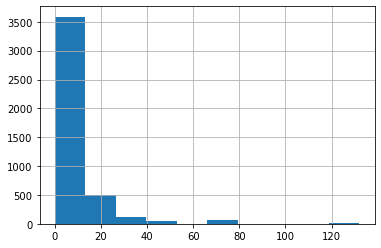

In [21]:
filt = df[["cycle", "fish_id", "quadrant", "sequence", "distance_cycle", "take"]]
filt["distance_cycle"].hist()
#filt[filt["distance_cycle"] > 20]


In [22]:
df["tail_diff"] = df["pen"] - df["ult"]


temp_max = df.groupby(["sequence", "cycle"])["tail_diff"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"tail_diff":"tail_diff_max"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')   

temp_min = df.groupby(["sequence", "cycle"])["tail_diff"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"tail_diff":"tail_diff_min"})
df = df.reset_index()
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')
df["tail_diff_min"] = df["tail_diff_min"].apply(lambda x: abs(x))



In [23]:
df["amplitude_cycle"] = df["tail_diff_max"] + df["tail_diff_min"]



In [24]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0000573316712842), (1.031550283841994...",...,1.003994,1.0,NaN,NaN,0.003362,11.401754,-0.002240,0.000431,0.003074,0.003506
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0017590444257127), (1.030902797752337...",...,1.001782,1.0,-0.002212,0.002212,0.003362,11.401754,-0.003074,0.000431,0.003074,0.003506
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21322,"((1.0, 0.9999164764406192), (1.032442409719052...",...,0.997957,1.0,-0.003825,0.003825,0.003362,11.401754,0.000431,0.000431,0.003074,0.003506
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21322,"((1.0, 1.0020090685512972), (1.031075590734383...",...,1.002005,1.0,0.004048,0.004048,0.003362,11.401754,-0.000254,0.000431,0.003074,0.003506
1288,17.492856,"(710, 490)","(677, 471)","(725, 499)",1,354.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0018316730915195), (1.030893514592229...",...,1.000076,1.0,NaN,NaN,0.003825,19.416488,0.001394,0.002105,0.004200,0.006305
1289,18.867962,"(712, 491)","(677, 471)","(728, 501)",1,361.5,2,"(440, 426, 408, 444)",21325,"((1.0, 1.0016460227135484), (1.031603718849273...",...,0.996479,1.0,-0.003597,0.003597,0.003825,19.416488,0.002105,0.002105,0.004200,0.006305


In [25]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

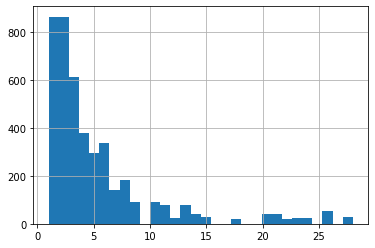

In [26]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number')        


df["c_counts"].hist(bins=30)

df = df.loc[(df["c_counts"] > 2) & (df["c_counts"] < 10)]

<AxesSubplot:>

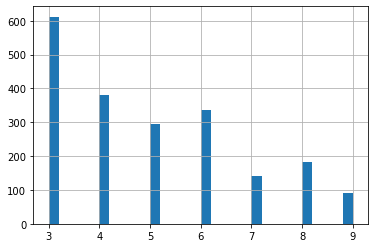

In [27]:
df["c_counts"].hist(bins=30)


In [28]:
#pd.set_option('display.max_columns', None)
#df[df["c_counts"] > 10].head(15)


<AxesSubplot:>

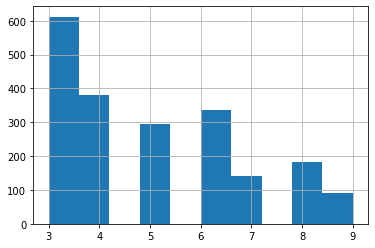

In [29]:
df["c_counts"].hist(bins=10)


In [30]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [31]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [32]:
#df["freq_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
#df["amp_veloc_esp"] = df["freq"]/df["fish_speed"]

In [33]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.tail(1)


<AxesSubplot:>

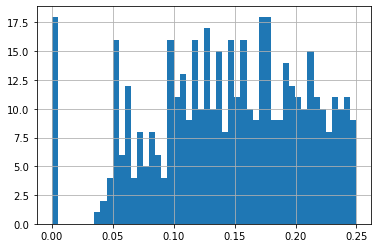

In [34]:
to_graphs.tail_uniformity.hist(bins=50)

In [35]:
only1 = to_graphs

<AxesSubplot:>

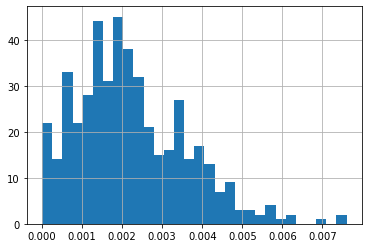

In [36]:
to_graphs["speed_cycle"].hist(bins=30)

In [37]:
#to_graphs = to_graphs.loc[to_graphs["speed_cycle"] > 0.005]

Decimal Representation p: 0.000000000000000000112611596486
Decimal Representation r: 0.403115655860773525187568111505


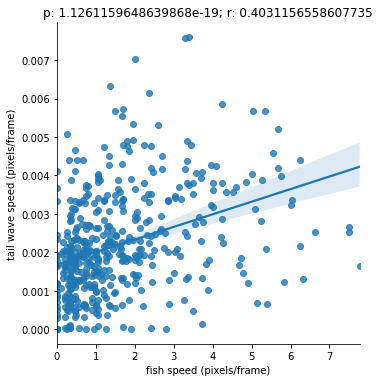

In [38]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=only1, x="fish_speed", y="speed_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(only1["fish_speed"], only1["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

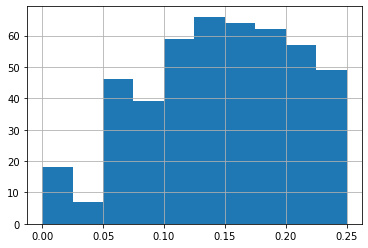

In [39]:

only1["tail_uniformity"].hist()



In [40]:
'''from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="freq", y="fish_speed")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])
ax.set(xlabel='freq', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")'''

'from scipy.stats.mstats import spearmanr\n\nax = sns.lmplot(data=only1, x="freq", y="fish_speed")\nr, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])\nax.set(xlabel=\'freq\', ylabel=\'amplitude_cycle\').set(title=\'p: \' + str(pvalue) + "; r: " + str(r))\n\nprint(pvalue)\nprint(f"Decimal Representation of p: {pvalue:.30f}")\nprint(f"Decimal Representation of r: {r:.30f}")'

1.410137164404666e-15
Decimal Representation of p: 0.000000000000001410137164404666
Decimal Representation of r: 0.358116676096202402046486668041


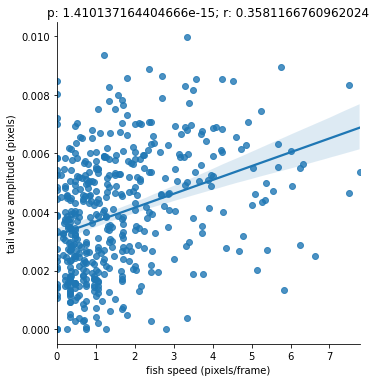

In [41]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [42]:
only1.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'tail_uniformity', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle', 'distance_cycle', 'tail_diff',
       'tail_diff_max', 'tail_diff_min', 'amplitude_cycle', 'c_counts',
       'fish_speed', 'fish_uid'],
      dtype='object')

In [43]:
only1["freq"] = 1/((only1["amplitude_cycle"]*2)/only1["speed_cycle"])


<ipython-input-43-9b7f31c701eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only1["freq"] = 1/((only1["amplitude_cycle"]*2)/only1["speed_cycle"])


In [52]:
only1 = only1.loc[only1["freq"] < 0.8]

0.01918122166277265
Decimal Representation of p: 0.019181221662772651032069504140
Decimal Representation of r: 0.111240057117003937614541086987


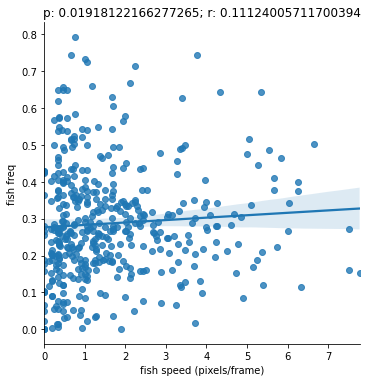

In [53]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq"])
ax = sns.lmplot(data=only1, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [45]:
only1["freq*ampli"] = only1["amplitude_cycle"]*only1["freq"]

<ipython-input-45-c166b94ecd4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only1["freq*ampli"] = only1["amplitude_cycle"]*only1["freq"]


1.028405279147394e-16
Decimal Representation of p: 0.000000000000000102840527914739
Decimal Representation of r: 0.371321138438830022909797889952


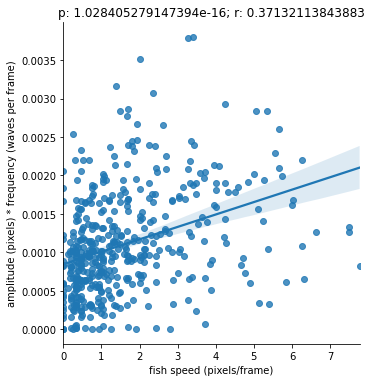

In [46]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

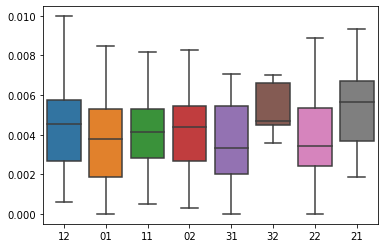

In [54]:
ax = sns.boxplot(data=df, x="fish_uid", y="amplitude_cycle", showfliers = False)
ax.set(xlabel='', ylabel='')


[Text(0.5, 0, ''), Text(0, 0.5, '')]

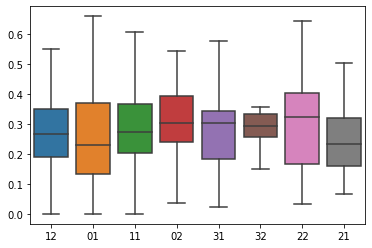

In [55]:
ax = sns.boxplot(data=only1, x="fish_uid", y="freq",showfliers = False)
ax.set(xlabel='', ylabel='')
